In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import csv
from pandas.tseries.offsets import MonthEnd
from datetime import datetime, timedelta, date
import requests
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.utils.multiclass import unique_labels

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
AMZN_10_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_10_train_flat_df_OHLC.csv", index_col=0)
AMZN_10_train = AMZN_10_train.reset_index(drop=True)


AMZN_10_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_10_test_flat_df_OHLC.csv", index_col=0)
AMZN_10_test = AMZN_10_test.reset_index(drop=True)


AMZN_14_train = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_14_train_flat_df_OHLC.csv", index_col=0)
AMZN_14_train = AMZN_14_train.reset_index(drop=True)


AMZN_14_test = pd.read_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_14_test_flat_df_OHLC.csv", index_col=0)
AMZN_14_test = AMZN_14_test.reset_index(drop=True)



In [3]:
X_test_1 = pd.concat([AMZN_10_train, AMZN_10_test])

y_test_1 = X_test_1.Label

X_test_1 = X_test_1.drop("Label", axis =1)



In [4]:
y_test_1_df = pd.DataFrame(y_test_1)
AMZN_10_export = X_test_1.to_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_10_X_test_OHLC.csv")
AMZN_10_export_labels = y_test_1_df.to_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_10_y_test_OHLC.csv")

In [5]:
saved_model = load_model('/Users/fahad/project_repo/data/final/OHLC/1D_CNN_FE_98_11_model_OHLC.h5')


W0818 13:27:40.422605 4727690688 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 13:27:40.439873 4727690688 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 13:27:40.472918 4727690688 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 13:27:40.535051 4727690688 deprecation_wrapper.py:119] From /Users/fahad/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 13:27:40.535792 

In [6]:
predictions = saved_model.predict_classes(np.array(X_test_1).reshape((*X_test_1.shape,1)),batch_size = X_test_1.shape[0], verbose=1)


68/68 [==============================] - 0s 1ms/step


In [7]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test_1, predictions))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1, predictions)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_1, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_1, predictions)
print('ROC AUC: %f' % auc)

saved model acc: 0.6323529411764706
Precision: 0.645161
Recall: 0.930233
F1 score: 0.761905
Cohens kappa: 0.059735
ROC AUC: 0.525116


In [8]:
X_test_2 = pd.concat([AMZN_14_train, AMZN_14_test])

y_test_2 = X_test_2.Label

X_test_2 = X_test_2.drop("Label", axis =1)

In [9]:
y_test_2_df = pd.DataFrame(y_test_2)
AMZN_14_export = X_test_2.to_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_14_X_test_OHLC.csv")
AMZN_14_export_labels = y_test_2_df.to_csv("/Users/fahad/project_repo/data/final/OHLC/AMZN/AMZN_14_y_test_OHLC.csv")

In [10]:
predictions_2 = saved_model.predict_classes(np.array(X_test_2).reshape((*X_test_2.shape,1)),batch_size = X_test_2.shape[0], verbose=1)



62/62 [==============================] - 0s 68us/step


In [11]:
from sklearn.metrics import accuracy_score
print ("saved model acc: %s" % accuracy_score(y_test_2, predictions_2))
# accuracy: (tp + tn) / (p + n)

# precision tp / (tp + fp)
precision = precision_score(y_test_2, predictions_2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_2, predictions_2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_2, predictions_2)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test_2, predictions_2)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test_2, predictions_2)
print('ROC AUC: %f' % auc)

saved model acc: 0.45161290322580644
Precision: 0.578947
Recall: 0.297297
F1 score: 0.392857
Cohens kappa: -0.020329
ROC AUC: 0.488649


In [12]:
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/ cm.sum(axis=1)[:,np.newaxis]
        print ("Normalised confusion matrix")
    else:
        print ("Confusion matrix, without normalisation")
        
    print (cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
        horizontalalignment = "center",
        color="white" if cm[i,j] > thresh else "black" )
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    

Confusion matrix, without normalisation
[[ 3 22]
 [ 3 40]]


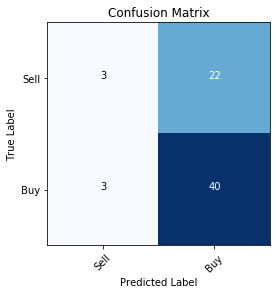

In [13]:
cm = confusion_matrix(y_test_1, predictions)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")

Confusion matrix, without normalisation
[[17  8]
 [26 11]]


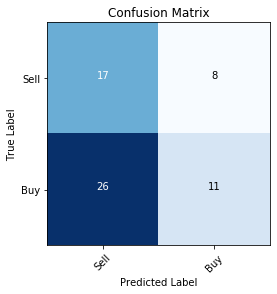

In [14]:
cm = confusion_matrix(y_test_2, predictions_2)
cm_labels = ['Sell', 'Buy']
plot_confusion_matrix(cm, cm_labels, title="Confusion Matrix")